Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [45]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,deltaorg,deltadest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    return pd.read_csv(file, header = 0)

def exercise_1(df):
    return df.columns.to_list()

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    return df.sample(n = k)

def exercise_4(df):
    return df.type.unique().tolist()

def exercise_5(df):
    return df.nameDest.value_counts()[:10]

def exercise_6(df):
    # A bit misleading, IMHO
    return df[df["isFraud"] == 1]

def exercise_7(df):
    df_1 = df.groupby('nameOrig')['nameDest'].agg(['nunique'])
    df_1.sort_values(by='nunique', ascending=False, inplace=True)
    return df_1

In [28]:
df = exercise_0('transactions.csv')
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0


Create graphs for the following.
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

'The dataset contains information about 200000 transactions, 147 of them classified as fraudulent. Transactions are divided in 5 categories, and 2 of them accounts for ~70% of the total. "Payment" is the most frequent type of transaction (~36.5%), followed by "Cash Out" (33.5%). Among the 147 fraudulent transactions, which accounts for the 0.07% of total transactions, they equally belong to two categories: "Cash out", with 75 fraudulent over 66488 (0.11%) and "Debit", with huge ~5% fraudulent transaction within the category. The company should carefully monitor "Debit" transaction, which are deeply affected by frauds.'

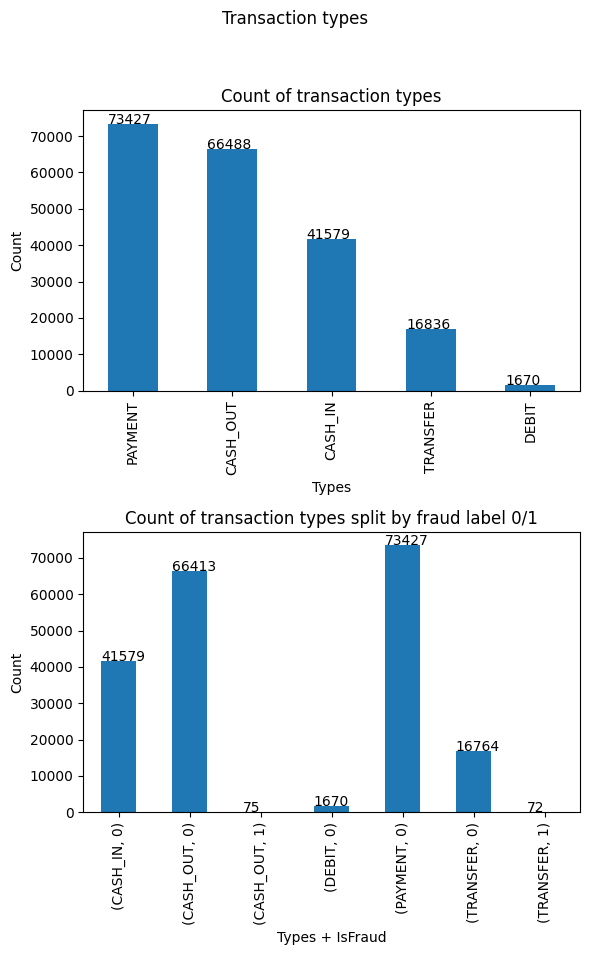

In [29]:
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()

    def transaction_counts_split_by_fraud(df):
        return df.groupby(by=['type', 'isFraud']).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Count of transaction types')
    axs[0].set_xlabel('Types')
    axs[0].set_ylabel('Count')

    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Count of transaction types split by fraud label 0/1')
    axs[1].set_xlabel('Types + IsFraud')
    axs[1].set_ylabel('Count')
    fig.suptitle('Transaction types')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))

    string = 'The dataset contains information about 200000 transactions, 147 of them classified as fraudulent. Transactions are divided in 5 categories, and 2 of them accounts for ~70% of the total. "Payment" is the most frequent type of transaction (~36.5%), followed by "Cash Out" (33.5%). Among the 147 fraudulent transactions, which accounts for the 0.07% of total transactions, they equally belong to two categories: "Cash out", with 75 fraudulent over 66488 (0.11%) and "Debit", with huge ~5% fraudulent transaction within the category. The company should carefully monitor "Debit" transaction, which are deeply affected by frauds.'
    return string

visual_1(df)

'Cash Out occurs in any withdraws of money. The following scatter plot relates only to cash out transactions. On the x-axis we have the difference in balance of the source balance after and before tha transaction. The same goes for the y-axis, displaying information about destination balance. When a withdrawing occurs, the deltas should always be negative, and so the scatter plot, which displays a coherent situation.'

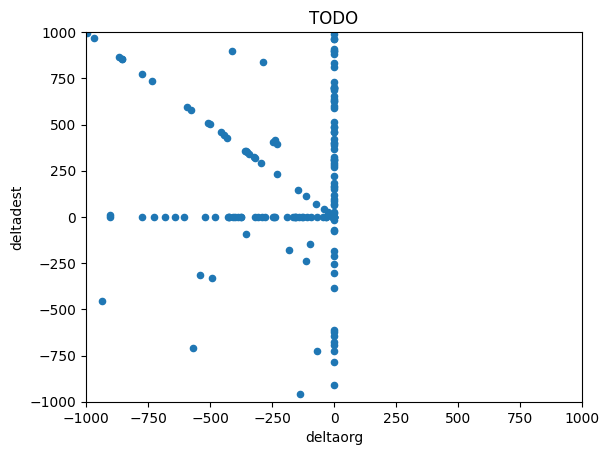

In [30]:
def visual_2(df):
    def query(df):
        df['deltaorg'] = df['newbalanceOrig'] - df['oldbalanceOrg']
        df['deltadest'] = df['newbalanceDest'] - df['oldbalanceDest']
        return df[df['type'] == 'CASH_OUT']

    plot = query(df).plot.scatter(x='deltaorg',y='deltadest')
    plot.set_title('TODO')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return "Cash Out occurs in any withdraws of money. The following scatter plot relates only to cash out transactions. On the x-axis we have the difference in balance of the source balance after and before tha transaction. The same goes for the y-axis, displaying information about destination balance. When a withdrawing occurs, the deltas should always be negative, and so the scatter plot, which displays a coherent situation."

visual_2(df)

Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

In [43]:
def exercise_custom(df):
    pass

def visual_custom(df):
    pass

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.